In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()

In [2]:
### im taking dataset from kaggle which is text classification dataset,
##in first i extracted data from bbc news but gets less accuracy with 150 documents due to less time period as professor
    #suggetion this data was extraxted from kaggle


In [3]:
mydata = pd.read_csv('newsdata.csv')


In [4]:

mydata.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [6]:
#data preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from sklearn.cluster import KMeans

In [7]:
documents = mydata['text'].values.astype('U')

In [8]:
vectorizer = TfidfVectorizer(stop_words='english')
features = vectorizer.fit_transform(documents)

In [9]:
k = 17
model = KMeans(n_clusters=k, init = 'k-means++', max_iter = 100, n_init = 1)
model.fit(features)

KMeans(max_iter=100, n_clusters=17, n_init=1)

In [10]:
mydata['cluster'] = model.labels_

In [11]:
mydata.head()

,title,text,subject,date,cluster
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",13
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",13
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",5


In [12]:
clusters = mydata.groupby('cluster')

for cluster in clusters.groups:
    f = open('cluster'+str(cluster)+'.csv','w', encoding="utf-8") #create csv file
    data = clusters.get_group(cluster)[['title','text','subject','date']] #get title, text, subject,date columns
    f.write(data.to_csv(index_label= 'id')) #set index to id
    f.close()

In [13]:
print('cluster centriods: \n')
order_centriods = model.cluster_centers_.argsort()[:,::-1]
terms = vectorizer.get_feature_names()

for i in range(k):
    print('cluster %d:' % i)
    for j in order_centriods[i, :10]: #print out 10 feature terms of each cluster
        print('%s' % terms[j])
    print('------------')

cluster centriods: 

cluster 0:
ban
order
trump
court
travel
refugees
countries
states
said
united
------------
cluster 1:
house
senate
obamacare
republican
healthcare
republicans
said
legislation
trump
insurance
------------
cluster 2:
court
supreme
gorsuch
senate
obama
garland
judge
justice
appeals
scalia
------------
cluster 3:
iran
nuclear
deal
tehran
sanctions
iranian
said
trump
agreement
missile
------------
cluster 4:
russia
russian
moscow
syrian
syria
putin
said
islamic
assad
state
------------
cluster 5:
said
police
state
people
reuters
year
government
president
trump
united
------------
cluster 6:
eu
brexit
britain
european
ireland
british
union
said
brussels
london
------------
cluster 7:
kurdish
independence
iraqi
spain
catalan
iraq
referendum
catalonia
madrid
baghdad
------------
cluster 8:
saudi
arabia
hariri
lebanon
yemen
riyadh
iran
al
lebanese
said
------------
cluster 9:
party
election
opposition
said
mugabe
government
percent
minister
vote
parliament
------------
clu

In [17]:
Y = vectorizer.transform(["officer"])
prediction = model.predict(Y)
print(prediction)

[5]


In [20]:
Y = vectorizer.transform(["trump"])
prediction = model.predict(Y)
print(prediction)

[13]


In [21]:
i='true'
print('type escape to exit the program')
while (i !='escape'):
    i=input('enter a sentence\n')
    if i !='escape':
        print(model.predict(vectorizer.transform([i])))

type escape to exit the program
enter a sentence
trump
[13]
enter a sentence
officer
[5]
enter a sentence
trump won the election
[13]
enter a sentence
fire accident near canada
[5]
enter a sentence
fire officer
[5]
enter a sentence
escape


In [24]:
mydata['subject'].unique()

array(['politicsNews', 'worldnews'], dtype=object)

<Figure size 576x432 with 0 Axes>

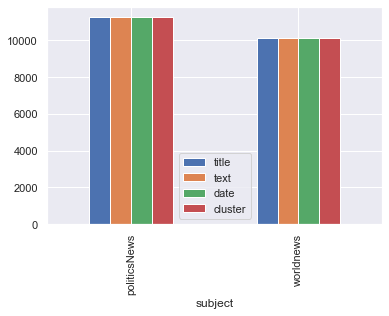

In [25]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
mydata.groupby('subject').count().plot.bar(ylim=0)
plt.show()

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(mydata['title'], mydata['subject'], random_state = 0)
vect = CountVectorizer()
X_train_Vec = vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_Vec)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [27]:
y_test.values

array(['worldnews', 'worldnews', 'worldnews', ..., 'worldnews',
       'politicsNews', 'worldnews'], dtype=object)

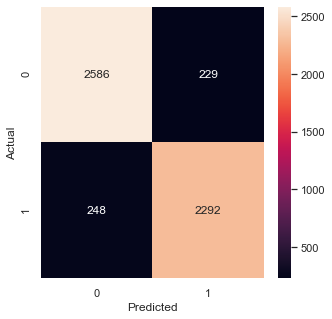

In [28]:
y_pred = clf.predict(vect.transform(X_test))
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9109243697478991

In [30]:
i='true'
print('type escape to exit the program')
while (i !='escape'):
    i=input('enter a sentence\n')
    if i !='escape':
        print(clf.predict(vect.transform([i])))

type escape to exit the program
enter a sentence
trump
['politicsNews']
enter a sentence
india
['worldnews']
enter a sentence
canada stuck at fire accident
['worldnews']
enter a sentence
escape


In [31]:
print(clf.predict(vect.transform(["trump"])))

['politicsNews']
